<a href="https://colab.research.google.com/github/AparnaRameshA95/Assigmnents/blob/main/APARNA_RAMESH_A_Assignment_on_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the iris dataset
df = pd.read_excel('/content/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking missing value
df.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [8]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
# Removing null with median
for i in ['SL', 'SW', 'PL']:
  df[i] = df[i].fillna(df[i].median())

# Checking missing values
df.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


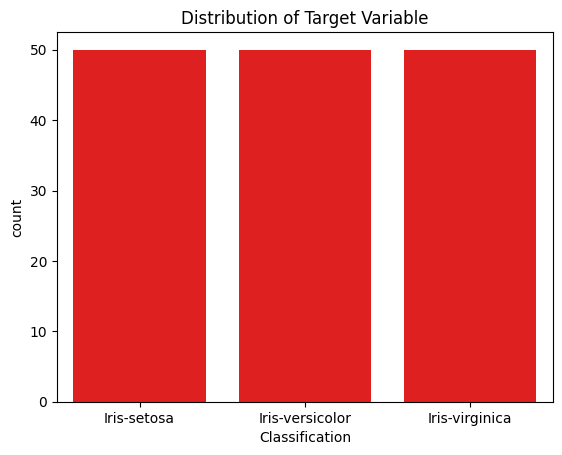

In [11]:
# Plot the distribution of the target variable
sns.countplot(x='Classification', data=df, color='red')
plt.title('Distribution of Target Variable')
plt.show()

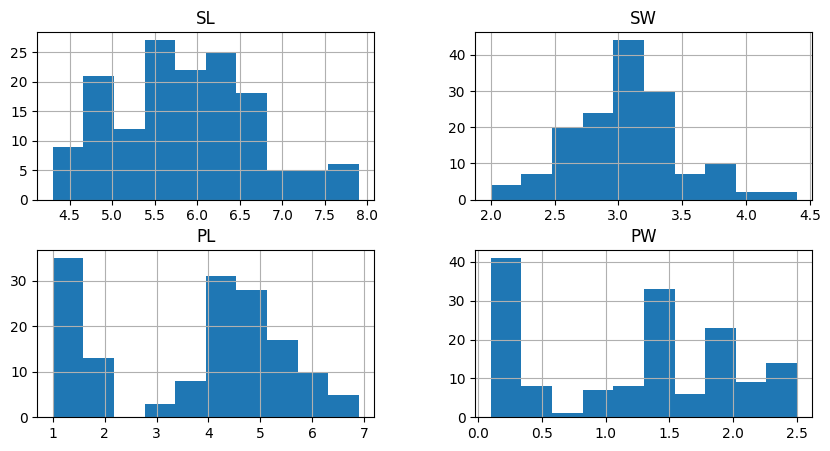

In [12]:
# frequency graph of features
df.select_dtypes(include=['float','int']).hist(figsize=(10,5))
plt.show()

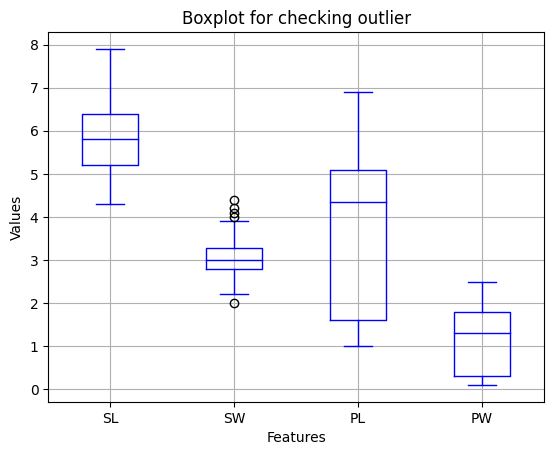

In [13]:
# Outlier checking using boxplot
df.boxplot(color='blue')
plt.title('Boxplot for checking outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

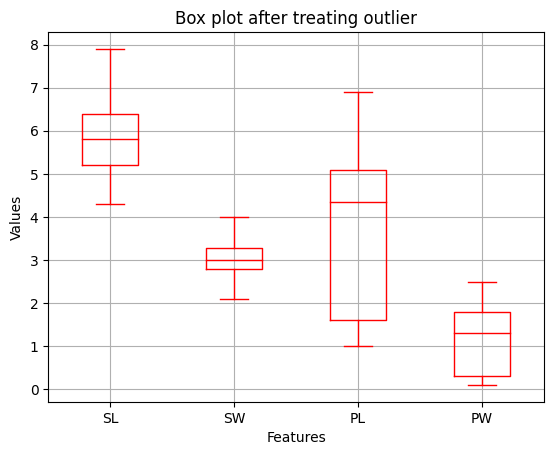

In [14]:
# IQR Method for treating Outliers on SW
Q1 = df['SW'].quantile(0.25)
Q3 = df['SW'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = df['SW'] < (Q1-1.5*IQR)
outlier_upper = df['SW'] < (Q3+1.5*IQR)

#clip the outliers
df['SW'] = df['SW'].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 0)

# Boxplot after IQR method
df.boxplot(color='red')
plt.title('Box plot after treating outlier')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [15]:
# Perform Label Encoding
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])
df['Classification'].unique()

array([0, 1, 2])

In [16]:
# Scale the Features
scaler = StandardScaler()
df[['SL', 'SW', 'PL','PW']] = scaler.fit_transform(df[['SL', 'SW', 'PL','PW']])
df.head()

,SL,SW,PL,PW,Classification
0,-0.934811,1.126012,-1.380791,-1.312977,0
1,-1.182990,-0.105724,-1.380791,-1.312977,0
2,-0.066181,0.386970,-1.438808,-1.312977,0
3,-1.555260,0.140623,-1.322775,-1.312977,0
4,-1.058900,1.372359,-1.380791,-1.312977,0


In [17]:
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression**

In [18]:
# Create and train the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
# Make prediction on the test set
y_pred = logit_model.predict(X_test)

# Evaluate the model
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0
Confusion matrix is [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**K-NN**

In [68]:
# Create and train the K-NN model
metric_k =[]
neighbors = np.arange(1,25)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [69]:
metric_k

[0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

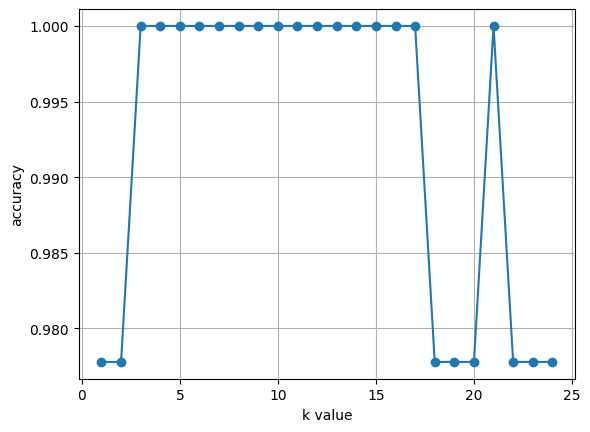

In [70]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [64]:
# Evaluate the model
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski',p=4)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0
Confusion matrix is [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**SVM**

In [59]:
# Train the SVM model
sv_clf =SVC(kernel='linear')
sv_clf.fit(X_train,y_train)
y_pred = sv_clf.predict(X_test)

# Evaluate the model
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))


Accuracy is 0.9777777777777777
Precision is 0.9761904761904763
Recall is 0.9743589743589745
f1 score is 0.974320987654321
Confusion matrix is [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


**Decision Tree**

In [61]:
# Train the model
dt_clf = DecisionTreeClassifier()
DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

# Evaluate the model
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is 0.9555555555555556
Precision is 0.9555555555555556
Recall is 0.9487179487179488
f1 score is 0.9484126984126983
Confusion matrix is [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


**Random Forest**

In [62]:
# Train the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0
Confusion matrix is [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Hyper parameter tuning**

In [63]:
rf_clf1 = RandomForestClassifier(criterion='Entropy',n_estimators=10)
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train,y_train)
y_pred = rf_clf1.predict(X_test)

# Evaluate the model
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='macro'))
print('Recall is', recall_score(y_test, y_pred, average='macro'))
print('f1 score is', f1_score(y_test,y_pred, average='macro'))
print('Confusion matrix is', confusion_matrix(y_test, y_pred))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0
Confusion matrix is [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
